<a href="https://colab.research.google.com/github/finardi/WatSpeed_LLM_foundation/blob/main/Module4%3A%20Question_answering_app_with_LangChain_and_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 - Question-answering app with LangChain and Streamlit

In this notebook, we will explore an example of using OpenAI's language model capabilities through LangChain, a Python library that simplifies the interaction with OpenAI's APIs. Additionally, we will showcase a demo application built using Streamlit and made accessible online using LocalTunnel.

### LangChain

[LangChain](https://python.langchain.com/en/latest/index.html) is a Python library designed to streamline the process of utilizing OpenAI's powerful language models. It provides a simple interface for sending requests to OpenAI's APIs and handling the responses. With LangChain, you can easily integrate OpenAI's language models into your own projects and applications.

### Streamlit

[Streamlit](https://streamlit.io/) is a popular Python library for building interactive web applications. It allows you to create and deploy data-driven apps quickly and easily. With Streamlit, you can develop user-friendly interfaces to interact with your models, visualize data, and present information in a seamless and interactive manner.

### LocalTunnel

[LocalTunnel](https://github.com/localtunnel/localtunnel) is a tool that enables you to expose your locally hosted web application to the internet, making it accessible to anyone with the generated URL. It allows you to share your Streamlit app online without the need for deploying it to a remote server. LocalTunnel provides a temporary public URL that can be used to access your locally running application from anywhere in the world.

In this notebook, we will combine the capabilities of LangChain, Streamlit, and LocalTunnel to create a question-answering app powered by OpenAI's language model. We will walk through the process of setting up the app, integrating the language model, and deploying it using Streamlit and LocalTunnel. Let's get started!

In the end, this notebook will provide a URL for an application that should look like this one:

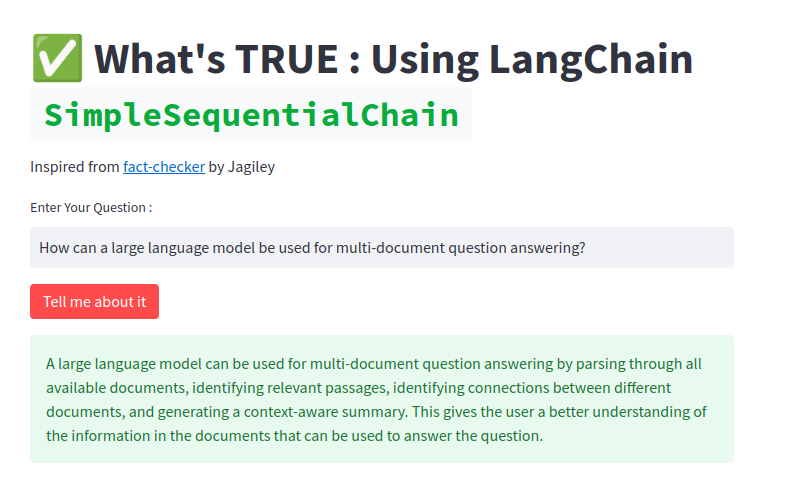

# Install the necessary libraries

First, we will install three Python libraries: **`langchain`**, **`streamlit`** and **`openai`**.

In [ ]:
!pip install langchain
!pip install streamlit
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Then, we install the localtunnel library using NPM. NPM stands for Node Package Manager. It is a package manager for JavaScript programming language and is primarily used to install, share, and manage JavaScript packages. In this case, we will use NPM to install the localtunnel library, which allows us to expose our local web application to the internet.

Notice that we are not using JavaScript in this notebook. After installation we can run localtunnel using the command line.

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.03s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



# Define OpenAI API key

Please, replace the placeholder **`[YOUR_API_KEY]`** with your actual OpenAI API key.

In [ ]:
import os
os.environ["OPENAI_KEY"] = "" # @param

# Explaining the code

In the following text we present the parts of the app.

It is a Streamlit application that uses LangChain and OpenAI to generate answers based on user questions and facts. Here's an explanation of the code:

```python
import streamlit as st
from langchain.chains import LLMChain, SimpleSequentialChain
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
import os
```
These lines import the necessary libraries and modules for the application. Streamlit is imported as `st`, LangChain chains and models are imported, and OpenAI model is imported from the LangChain module. The `os` module is imported to access the environment variables.

```python
st.title("✅ What's TRUE  : Using LangChain `SimpleSequentialChain`")
```
This sets the title of the Streamlit app.

```python
st.markdown("Inspired from [fact-checker](https://github.com/jagilley/fact-checker) by Jagiley")
```
This adds a markdown text that displays a link to the GitHub repository that inspired the app.

```python
API = os.environ["OPENAI_KEY"]
if API:
    llm = OpenAI(temperature=0.7, openai_api_key=API)
else:
    st.warning("Enter your OPENAI API-KEY. Get your OpenAI API key from [here](https://platform.openai.com/account/api-keys).\n")
```
These lines retrieve the OpenAI API key from the environment variables. If the API key is provided, an instance of the OpenAI language model is created with a temperature of 0.7. If the API key is not provided, a warning message is displayed.

```python
user_question = st.text_input(
    "Enter Your Question : ",
    placeholder="Cyanobacteria can perform photosynthesis, are they considered as plants?",
)
```
This adds a text input box where the user can enter their question. The provided example question is used as a placeholder.

```python
if st.button("Tell me about it", type="primary"):
    # Chain 1: (Question Chain) Generating a rephrased version of the user's question
    template = """{question}\n\n"""
    prompt_template = PromptTemplate(input_variables=["question"], template=template)
    question_chain = LLMChain(llm=llm, prompt=prompt_template)

    # Chain 2: (Assumptions Chain) Generating assumptions made in the statement
    template = """Here is a statement:
        {statement}
        Make a bullet point list of the assumptions you made when producing the above statement.\n\n"""
    prompt_template = PromptTemplate(input_variables=["statement"], template=template)
    assumptions_chain = LLMChain(llm=llm, prompt=prompt_template)
    assumptions_chain_seq = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain], verbose=True
    )

    # Chain 3: (Fact Checker Chain) Fact checking the assumptions
    template = """Here is a bullet point list of assertions:
    {assertions}
    For each assertion, determine whether it is true or false. If it is false, explain why.\n\n"""
    prompt_template = PromptTemplate(input_variables=["assertions"], template=template)
    fact_checker_chain = LLMChain(llm=llm, prompt=prompt_template)
    fact_checker_chain_seq = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain, fact_checker_chain], verbose=True
    )

    # Final Chain: (Answer Chain) Generating the final answer to the user's question based on the facts and assumptions
    template = """In light of the above facts, how would you answer the question '{}'""".format(
        user_question
    )
    template = """{facts}\n""" + template
    prompt_template = Prompt

Template(input_variables=["facts"], template=template)
    answer_chain = LLMChain(llm=llm, prompt=prompt_template)
    overall_chain = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain, fact_checker_chain, answer_chain],
        verbose=True,
    )

    # Running all the chains on the user's question and displaying the final answer
    st.success(overall_chain.run(user_question))
```
This part of the code executes when the "Tell me about it" button is clicked. It defines a sequence of LangChain models that are used to generate the final answer based on the user's question and the provided facts. Each chain has a template that defines the input variables and prompts to generate the desired outputs. The `LLMChain` and `SimpleSequentialChain` classes from LangChain are used to create and run the chains. The final answer is displayed using `st.success()`.

The code defines four chains that are used to generate the final answer based on the user's question and the provided facts. Here's an explanation of each chain:

1. **Question Chain**: This chain generates a rephrased version of the user's question. It takes the original question as input and outputs a rephrased question. The rephrased question helps in generating a more comprehensive response by exploring different ways of asking the same question.

2. **Assumptions Chain**: This chain generates a list of assumptions made in the statement. It takes a statement as input and outputs a bullet point list of the assumptions made when producing the statement. This helps in identifying and understanding the underlying assumptions behind the statement.

3. **Fact Checker Chain**: This chain fact checks the assumptions made in the previous chain. It takes a bullet point list of assertions as input and determines whether each assertion is true or false. If an assertion is false, it also provides an explanation for why it is false. This chain helps in verifying the accuracy of the assumptions and providing evidence-backed information.

4. **Answer Chain**: This chain generates the final answer to the user's question based on the facts and assumptions obtained from the previous chains. It takes the facts as input, along with the user's question, and generates a comprehensive answer. The answer is formulated in light of the provided facts and assumptions.

By sequentially running these chains, the application aims to provide an informative and well-reasoned answer to the user's question by considering different perspectives and verifying the underlying assumptions.

# Running the app

Let's write the app's code to the file app.py.

In [ ]:
%%writefile app.py
import streamlit as st # import the Streamlit library
from langchain.chains import LLMChain, SimpleSequentialChain # import LangChain libraries
from langchain.llms import OpenAI # import OpenAI model
from langchain.prompts import PromptTemplate # import PromptTemplate
import os #

# Set the title of the Streamlit app
st.title("✅ What's TRUE  : Using LangChain `SimpleSequentialChain`")

# Add a link to the Github repository that inspired this app
st.markdown("Inspired from [fact-checker](https://github.com/jagilley/fact-checker) by Jagiley")

# If an API key has been provided, create an OpenAI language model instance
API = os.environ["OPENAI_KEY"]
if API:
    llm = OpenAI(temperature=0.7, openai_api_key=API)
else:
    # If an API key hasn't been provided, display a warning message
    st.warning("Enter your OPENAI API-KEY. Get your OpenAI API key from [here](https://platform.openai.com/account/api-keys).\n")

# Add a text input box for the user's question
user_question = st.text_input(
    "Enter Your Question : ",
    placeholder = "Cyanobacteria can perform photosynthetsis , are they considered as plants?",
)

# Generating the final answer to the user's question using all the chains
if st.button("Tell me about it", type="primary"):
    # Chain 1: Generating a rephrased version of the user's question
    template = """{question}\n\n"""
    prompt_template = PromptTemplate(input_variables=["question"], template=template)
    question_chain = LLMChain(llm=llm, prompt=prompt_template)

    # Chain 2: Generating assumptions made in the statement
    template = """Here is a statement:
        {statement}
        Make a bullet point list of the assumptions you made when producing the above statement.\n\n"""
    prompt_template = PromptTemplate(input_variables=["statement"], template=template)
    assumptions_chain = LLMChain(llm=llm, prompt=prompt_template)
    assumptions_chain_seq = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain], verbose=True
    )

    # Chain 3: Fact checking the assumptions
    template = """Here is a bullet point list of assertions:
    {assertions}
    For each assertion, determine whether it is true or false. If it is false, explain why.\n\n"""
    prompt_template = PromptTemplate(input_variables=["assertions"], template=template)
    fact_checker_chain = LLMChain(llm=llm, prompt=prompt_template)
    fact_checker_chain_seq = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain, fact_checker_chain], verbose=True
    )

    # Final Chain: Generating the final answer to the user's question based on the facts and assumptions
    template = """In light of the above facts, how would you answer the question '{}'""".format(
        user_question
    )
    template = """{facts}\n""" + template
    prompt_template = PromptTemplate(input_variables=["facts"], template=template)
    answer_chain = LLMChain(llm=llm, prompt=prompt_template)
    overall_chain = SimpleSequentialChain(
        chains=[question_chain, assumptions_chain, fact_checker_chain, answer_chain],
        verbose=True,
    )

    # Running all the chains on the user's question and displaying the final answer
    st.success(overall_chain.run(user_question))

Overwriting app.py


Then, we have to run the app.py file using stramlit. To run the `app.py` file using Streamlit, use the command below, which executes the Streamlit app in the background, redirects the output to a `logs.txt` file, and runs it as a background process using the `&` symbol. This allows the app to run continuously while you can continue working in the notebook or terminal.

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

# Publish the app online

To publish the app online using LocalTunnel, we first have to retrieve the current public IP of this Google Lab session.

In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.224.119.169


The next command starts the LocalTunnel using. This command will create a tunnel to port 8501, which is the default port used by Streamlit. The tunnel allows access to the Streamlit app from the internet.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 3.338s
your url is: https://cyan-cameras-matter.loca.lt


You will see a screen like the one below when you click on the generated URL. Please, fill the Endpoint IP with the public IP retrieved in the previous cell and click on Click to Submit.

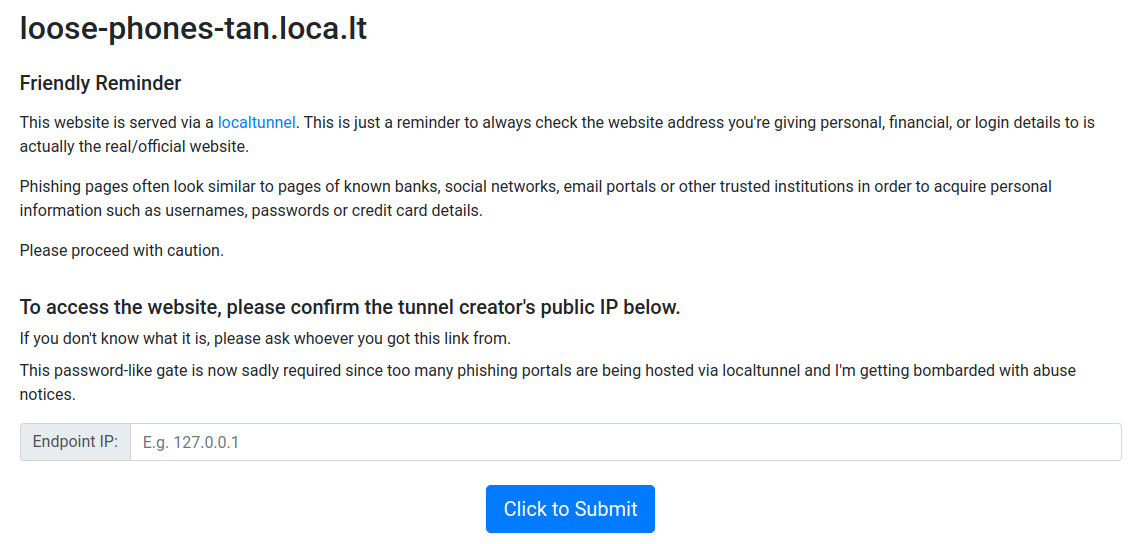